# Creating the Model Grid

This notebook is used to generate and visualize the grids that my model will use. First, import the necessary packages to create the model grid.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

## An's Model of the Tonkin Gulf

The grid for An's model will be located in the Tonkin Gulf off the northern coast of Vietnam covering  $18.5^{\circ}-22^{\circ}N$, $105.5^{\circ}-110^{\circ}E$ . The grid spacing will be $1/40^{\circ}$ in the zonal (east-west) direction and $1/40^{\circ}$ in the meridional (north-south) direction, covering a grid of 140 rows and 180 columns. 

In the data file for my model, I will specifiy the following parameters in the `PARM04` namelist in the `data` file:

```
usingSphericalPolarGrid=.TRUE.,
delX=180*0.025,
delY=140*0.025,
xgOrigin=105.5,
ygOrigin=18.5,
```

This grid can be recreated in Python as follows:

In [2]:
# define the parameters that will be used in the data file
delX = 1/40
delY = 1/40
xgOrigin = 105.5
ygOrigin = 18.5
n_rows = 140
n_cols = 180

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX+delX/2, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY+delY/2, delY)
XC, YC = np.meshgrid(xc, yc)

### Visualizing the Grid
The grids above can be visualized as follows:

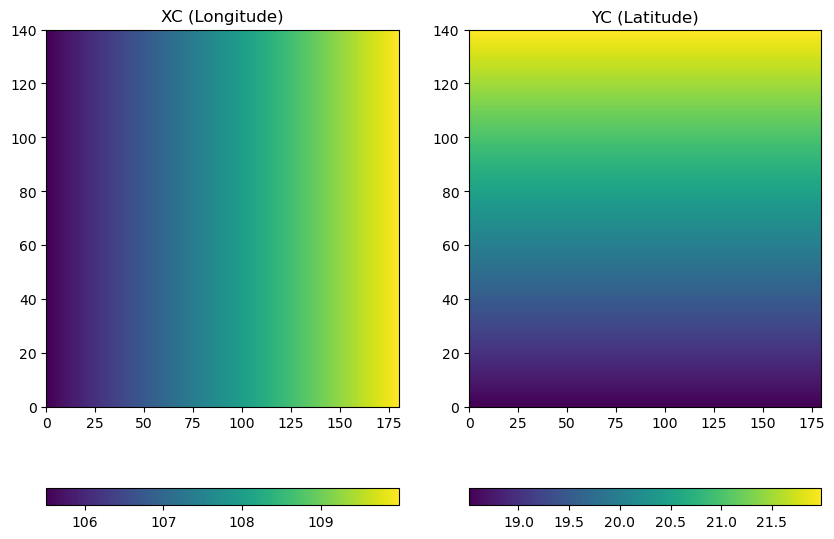

In [3]:
# make a plot of XC and YC
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
C = plt.pcolormesh(XC)
plt.colorbar(C, orientation = 'horizontal')
plt.title('XC (Longitude)')

plt.subplot(1,2,2)
C = plt.pcolormesh(YC)
plt.colorbar(C, orientation = 'horizontal')
plt.title('YC (Latitude)')

plt.show()

### Visualizing the Grid on a Map with Cartopy
The Tonkin Gulf is located between the Eastern coast of Vietnam, the Southern coast of China, and Hainan Island. To understand where that is, I will provide a visualization of the geographic area marked in green.

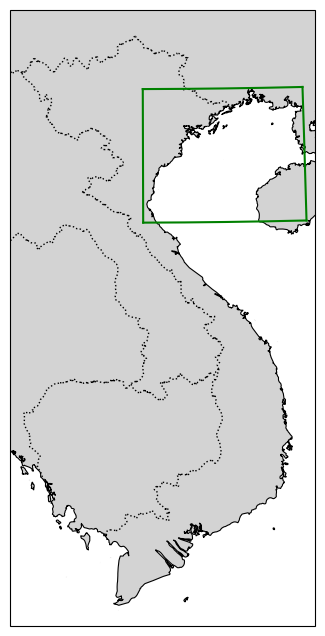

In [4]:
plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.Orthographic(105.0,16.0))

ax.plot(XC[:,0], YC[:,0], 'g-', linewidth=1.5, transform=ccrs.PlateCarree())
ax.plot(XC[:,-1], YC[:,-1], 'g-', linewidth=1.5, transform=ccrs.PlateCarree())
ax.plot(XC[0,:], YC[0,:], 'g-', linewidth=1.5, transform=ccrs.PlateCarree())
ax.plot(XC[-1,:], YC[-1,:], 'g-', linewidth=1.5, transform=ccrs.PlateCarree())

ax.coastlines(resolution='10m', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAND, facecolor='lightgray')
ax.add_feature(cartopy.feature.OCEAN, facecolor='white')

ax.set_extent([102, 110, 8, 24], crs=ccrs.PlateCarree()) 